<a href="https://colab.research.google.com/github/beatriz007/data-projects/blob/master/clustering_practice_completed_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Clustering Challenge

Challenge: create an algorithm that curates different playlists of similar music for the company's users.** These playlists should contain one or multiple songs that are similar in some way.

## Approach
We will ise clustering analysis (k-means) alongside some standard data manipulation techniques, Exploratory Data Analysis (EDA) and visualisation.

## Data
Original data source: [Kaggle](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018)

**Data Description**

You have access to an internal dataset of the top 100 songs played on Spotify in 2018. For each of these songs, several audio features have been extracted. Specifically, the information you have for each song is:
- **id** <br> Spotify URI of the song
- **name** <br> Name of the song
- **artists** <br> Artist(s) of the song
- **danceability** <br> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy** <br> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **key** <br> The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **loudness** <br> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **mode** <br> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** <br> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness** <br> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness** <br> Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness** <br> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence** <br> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo** <br> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **duration_ms** <br> The duration of the track in milliseconds.
- **time_signature** <br> An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).



## Import libraries

In [ ]:
# pandas is used for data manipulation
import pandas as pd
# numpy gives us access to some useful data structures
import numpy as np

# matplotlib allows us to do basic plots
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is another visualisation library
import seaborn as sns

# Import a scalar
from sklearn.preprocessing import scale

# Bring in k-means
from sklearn.cluster import KMeans

## Source the data

We are using Google Colab as DS environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pwd

/content/sample_data


In [ ]:
cd..

SyntaxError: ignored

In [ ]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [ ]:
# Import the data
df = pd.read_csv('spotify.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import files
upload = files.upload()

Saving bank-data.csv to bank-data.csv


## Explore the data

<div class="alert alert-warning">
    <p>Use this section to do some exploration of your dataset. Some ideas might include:</p>
    <ul>
        <li>Explore the data and its types using functions such as df.info() or df.head().</li>
        <li>Explore the different variables in the data and comment on any patterns you can see.</li>
        <li>Have a think about which variables are more and less useful.</li>
        <li>Create some interesting visualisations using <a href="https://seaborn.pydata.org/">Seaborn</a> and/or <a href="https://matplotlib.org/">Matplotlib.</a> Think pairplots, heatmaps, histograms, scatter plots, etc. You could even try plotting a three-dimensional graph using <a href="https://plot.ly/python/">Plotly</a> (advanced).</li>
        <li>Share any thoughts you have about transformations and manipulation you're going to need to do.</li>
    </ul>
<p>Be sure to thoroughly explain your analysis around the code you write. Also, trying answering the questions in green.</p>
</div>

Now that we've imported our data, it's useful to run a few summary functions on it in order to understand it better.

In [ ]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


Just looking at the first few rows of our data, we can see that there are some values that won't be useful for our analysis. "id", for example, gives no useful information about our songs.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


We can see that our data contains 100 entries and there are no missing values.

Each row represents a single song and each song has several attributes present, mainly about the type of sound (like danceability, loudness, speechiness, and valence). Each song also has a unique ID and artist.

pandas has imported each column either as an object or float64. This is mainly correct, although variables like "key" and "time_signature" should probably be converted to objects as they don't technically represent numbers.

In [ ]:
# We can look for correlations between our variables using .corr()
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782
speechiness,0.227075,-0.073591,0.019583,-0.252037,-0.150076,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856,0.235615
acousticness,-0.134374,-0.421209,0.141590,-0.269742,-0.030028,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627,-0.158935
instrumentalness,-0.066592,0.093684,-0.136607,0.036248,0.089667,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873,0.011894
liveness,-0.038761,0.050542,-0.125443,0.000006,0.024428,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942,-0.079558
valence,0.413855,0.382434,-0.032622,0.407760,-0.210599,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901,0.223410


The table above shows us a correlation matrix for each of the variables in our dataset. To help make this a bit more readable, we can sort these values to see the greatest and smallest correlations.

In [ ]:
df.corr().unstack().sort_values(kind="quicksort")

acousticness    energy           -0.421209
energy          acousticness     -0.421209
acousticness    loudness         -0.269742
loudness        acousticness     -0.269742
                speechiness      -0.252037
                                    ...   
                loudness          1.000000
key             key               1.000000
energy          energy            1.000000
duration_ms     duration_ms       1.000000
time_signature  time_signature    1.000000
Length: 169, dtype: float64

On the bottom of the table, we can see that obviously each variable is perfectly correlated with itself.

Once we skip past these values though, we can see that loudness and energy are highly positively correlated, and much more so that most other values.

We can also see that acousticness and energy tend to have a negative correlation.

This information is useful to know as we start thinking about which variables we want to include in our clustering analysis. It could be redundant, or possibly have an overwhelming effect on our analysis, for example, to include both loudness AND energy.

Visualisations can also be a great way to start understanding our data a bit more at this point.

You can visualise our correlation matrix above using Seaborn.

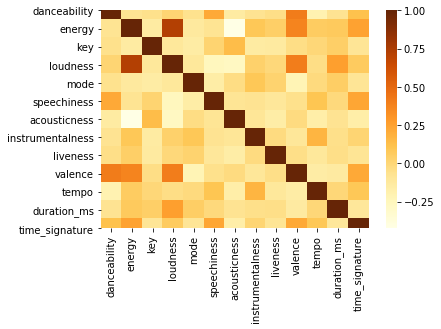

In [ ]:
sns.heatmap(df.corr(),cmap="YlOrBr")

Let's start by looking at the distributions of some of our columns.

In [ ]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

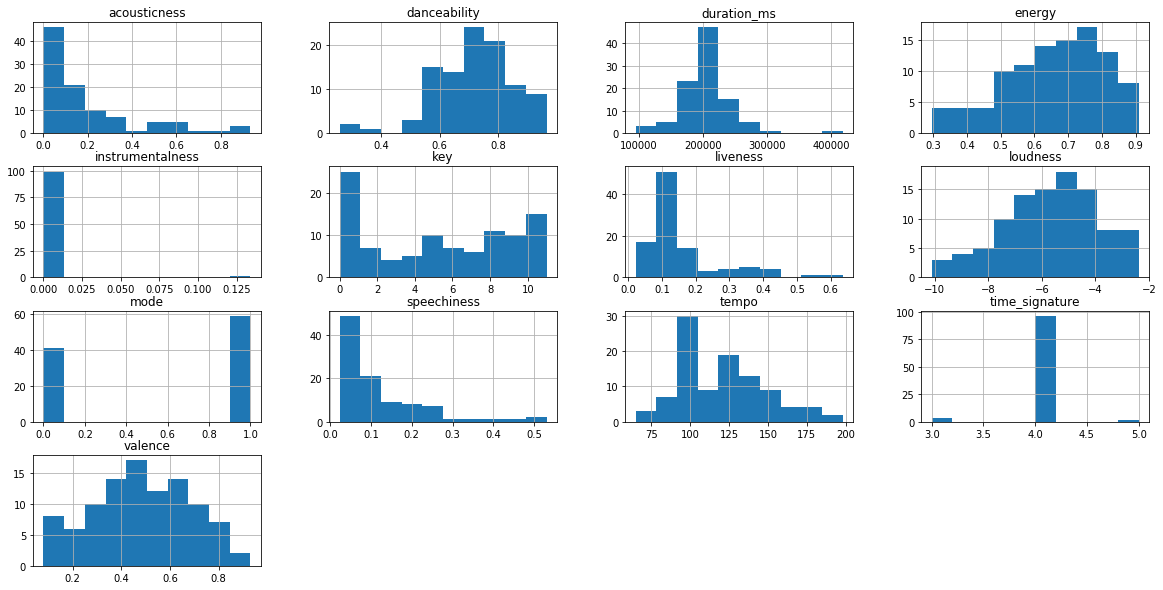

In [ ]:
df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']].hist(figsize=(20,10))
plt.show()

These visualisations are interesting.

We can see that our dataset tends to have fewer acoustic, live, and "speechy" songs. It also looks to have more "danceable" songs than not. And there seems to be a broad range of keys represented.

Let's take two interesting variables and put them on a scatter plot.

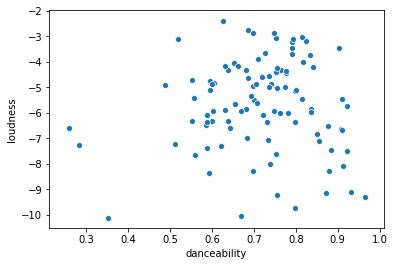

In [ ]:
sns.scatterplot(x=df['danceability'], y=df['loudness'])

With this plot, we can see more clearly what our correlation analysis above shows: that there is very little correlation between danceability and loudness.

<div class="alert alert-success">
    <strong>Question 1</strong>
    <p>What is the range between the shortest and longest song?</p>
</div>

In [ ]:
# The max and min functinos allow us to pull the maximum and minimum values for a column and then subtract them
df['duration_ms'].max() - df['duration_ms'].min()

322453.0

If we want, we can find out what the longest song is by "loc"ating the row with a condition that its duration is equal to the maximum duration.

In [ ]:
df.loc[df['duration_ms'] == df['duration_ms'].max()]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
21,3V8UKqhEK5zBkBb6d6ub8,Te Bot? - Remix,Nio Garcia,0.903,0.675,11.0,-3.445,0.0,0.214,0.542,0.000013,0.0595,0.442,96.507,417920.0,4.0


We can do the same to find the shortest song.

In [ ]:
df.loc[df['duration_ms'] == df['duration_ms'].min()]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
94,3GVkPk8mqxz0itaAriG1L,Everybody Dies In Their Nightmares,XXXTENTACION,0.734,0.57,7.0,-7.066,0.0,0.133,0.847,0.000021,0.112,0.689,129.953,95467.0,4.0


<div class="alert alert-success">
    <strong>Question 2</strong>
    <p>Which song is the most danceable?</p>
</div>

We can use similar code above to find the most danceable song.

In [ ]:
df.loc[df['danceability'] == df['danceability'].max()]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
91,6vN77lE9LK6HP2DewaN6H,Yes Indeed,Lil Baby,0.964,0.346,5.0,-9.309,0.0,0.53,0.035,0.0,0.108,0.562,119.958,142273.0,4.0


<div class="alert alert-success">
    <strong>Question 3</strong>
    <p>Which artist has the most songs in the Top 100?</p>
</div>

value_counts() allows us to find how many times an entry is made in a particular column.

In [ ]:
df['artists'].value_counts()

Post Malone     6
XXXTENTACION    6
Drake           4
Ed Sheeran      3
Marshmello      3
               ..
Jonas Blue      1
Zedd            1
Loud Luxury     1
Anne-Marie      1
Dean Lewis      1
Name: artists, Length: 70, dtype: int64

We can see that Post Malone and XXXTENTACION are tied for the most songs in the top 100.

<div class="alert alert-success">
    <strong>Question 4</strong>
    <p>Which way does the acousticness feature skew?</p>
</div>

We can use a histogram to find which way a feature skews. An alternate way of creating histograms to the method above can be found below.

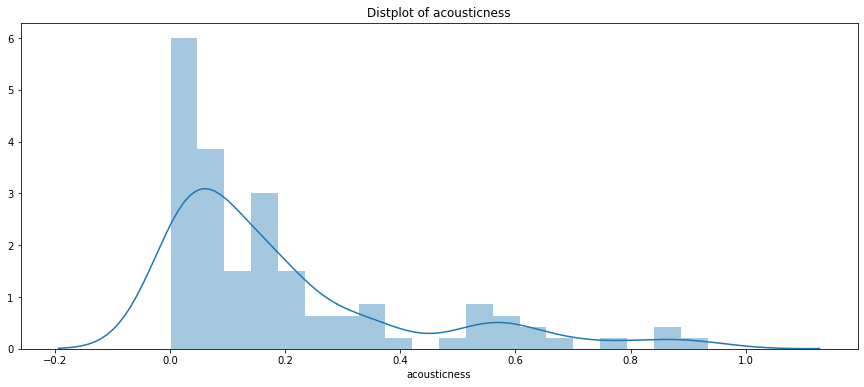

In [ ]:
plt.figure(1 , figsize = (15 , 6))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['acousticness'] , bins = 20)
plt.title('Distplot of acousticness')
plt.show()

From this Seaborn chart, we can see that acousticness skews right (or has a positive skew).

## Transform the data

<div class="alert alert-warning">
    <p>Use this section to process your data appropriately before putting it into your model. The documentation for <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">KMeans</a> from scikit-learn might be helpful.</p>

<p>Some things to consider:</p>
    <ul>
        <li>Which variables do you want to consider in your analysis? Why or why not?</li>
        <li>Do you need to transform any of the columns from one data type to another?</li>
        <li>Do you want to try making multiple models with different variable combinations?</li>
        <li>Do you need to <a href="https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e">scale your data</a>? <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">Which scalar</a> do you want to use?</li>
    </ul>
<p>Be sure to thoroughly explain your analysis around the code you write. Also, trying answering the questions in green.</p>
</div>

Before we do our analysis, we need to prepare our data.

Given our evaluation in the last section, I'm going to try a handful of different combinations of features for my model:
1. Try every genuine float feature
2. Select three random variables

Trial and error is often a good starting point.

To this end, the next few pieces of code will set our data up along these lines.

In [ ]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
# select all float columns
columns_1 = ['danceability', 'energy', 'loudness',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'duration_ms']
# select 3 variables
columns_2 = ['danceability', 'speechiness', 'liveness']

Now I'll scale the data using scale from sklearn.preprocessing

In [ ]:
scaled_data_1 = scale(df[columns_1])
scaled_data_2 = scale(df[columns_2])

In [ ]:
# Check the data scaled correctly
scaled_data_1

array([[ 2.87854418e-01, -1.45531381e+00, -1.99775342e+00,
        -6.31616047e-02, -7.39183533e-01, -1.12147339e-01,
         3.54356657e+00, -6.21334170e-01, -1.49154384e+00,
        -1.56598713e-01],
       [ 1.80503277e-01, -3.19107656e-01,  4.50983777e-01,
         2.82982066e-01,  2.83383288e-01,  1.59655675e-01,
        -3.17743517e-01, -5.57890736e-02, -1.56644356e+00,
        -9.69689736e-01],
       [-9.92691342e-01, -8.59498390e-01, -2.33147372e-01,
        -2.47771562e-01, -3.57995367e-01, -1.13440180e-01,
        -2.45737735e-01, -1.67929353e+00,  1.39408485e+00,
         3.25071113e-01],
       [ 1.72835338e-01, -6.93224318e-01, -1.31927625e+00,
         1.37592109e-02,  1.74809199e+00, -1.18342514e-01,
        -4.16751468e-01, -2.21552292e-01,  7.05712435e-01,
         4.07794527e-01],
       [ 9.08957452e-01, -2.29042534e-01, -8.78401779e-02,
         9.06800265e-02, -6.22279764e-01, -1.13858672e-01,
         2.13945381e+00, -6.55461892e-01, -1.00776703e+00,
         3.

<div class="alert alert-success">
    <strong>Question 1</strong>
    <p>Which variables from this data are not suitable to include in k-means? Why not?</p>
</div>

In [ ]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

There are a couple of columns above that are not suitable to include in k-means. K-means only allows use of variables that have a "meaningful mean" or average. Therefore, any variables that are non-numeric, identifiers, or categorical won't work.

In our case, these variables are:
- id
- name
- artist
- key
- mode
- time_signature

<div class="alert alert-success">
    <strong>Question 2</strong>
    <p>Which variables does <code>pandas</code> import improperly?</p>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


pandas imports all of the data as either an object or a float. Even though the variables are represented as numbers, key, mode and time_signature really should be represented as objects (or at least integers) to prevent them from being treated as numeric values.

<div class="alert alert-success">
    <strong>Question 3</strong>
    <p>Is there any missing data in your dataset? If so, which and how have you handled it?</p>
</div>

There is no missing data! (This is unusual.) If there had been, we would either have needed to find the data, drop the rows, or input values.

## Model the data and evaluate your models

<div class="alert alert-warning">
<p>Use this section to do your clustering analysis. Feel free to try and explore many different things, as long as you run a standard k-means analysis at least once. You may want to try building multiple models with different features, using different clustering algorithms, and/or tweaking different model parameters.</p>
    
<p>Some things to consider:</p>
    <ul>
        <li>What is the optimum value for <i>k</i>? How do you know?</li>
        <li>What measures will you use to evaluate the quality of your model?</li>
        <li>What do these measures say about your model(s)?</li>
        <li>How can you improve your model(s)?</li>
        <li>Can you visalise your clusters?</li>
    </ul>

<p>Be sure to thoroughly explain your analysis around the code you write.</p>
</div>

To create my clusters, I'm going to use the k-means method. I'll start by using the elbow method to identify the optimal number for each of the different trials I'm running.

#### Trial 1

Text(0.5, 1.0, 'Elbow test')

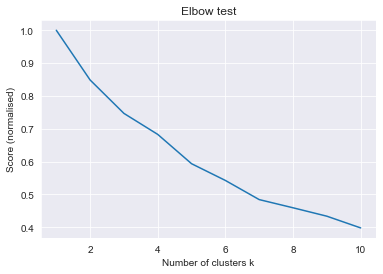

In [ ]:
num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(scaled_data_1).inertia_ for i in num_clusters]

# Optional
# We can choose to normalise the scores with respect to the score for k=1 (the highest score)
scores_normalised = scores/scores[0]

# Plot the test
sns.set_style('darkgrid')
sns.lineplot(num_clusters, scores_normalised)
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")

Looks like there's no clear elbow in this one. I think I'll choose k = 8.

In [ ]:
# Create the model
model = KMeans(n_clusters = 8, random_state= 123)
# Fit the model to our data
model.fit(scaled_data_1)
# Save the results as a new column in our data
df['cluster_1'] = model.labels_


<class 'sklearn.cluster.k_means_.KMeans'>


In [ ]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_1,cluster_2
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,2,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,0,3
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,1,2
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,7,3
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,2,1


Now that our clusters are included in our dataframe, we can plot and understand what happened a bit better.

Let's start by printing out our new "playlists".

##### Playlist #1

In [ ]:
# Pull song and artist name where the cluster column is equal to 0
df[['name', 'artists']][df['cluster_1'] == 0]

,name,artists
1,SAD!,XXXTENTACION
7,One Kiss (with Dua Lipa),Calvin Harris
8,IDGAF,Dua Lipa
9,FRIENDS,Marshmello
12,Nice For What,Drake
14,The Middle,Zedd
15,All The Stars (with SZA),Kendrick Lamar
20,"These Days (feat. Jess Glynne, Macklemore & Da...",Rudimental
21,Te Bot? - Remix,Nio Garcia
24,New Rules,Dua Lipa


Only one song!

In [ ]:
# Pull song and artist name where the cluster column is equal to 1
df[['name', 'artists']][df['cluster_1'] == 1]

,name,artists
2,rockstar (feat. 21 Savage),Post Malone
93,This Is Me,Keala Settle
98,Dusk Till Dawn - Radio Edit,ZAYN


In [ ]:
# Pull song and artist name where the cluster column is equal to 2
df[['name', 'artists']][df['cluster_1'] == 2]

,name,artists
0,God's Plan,Drake
4,In My Feelings,Drake
6,I Like It,Cardi B
11,Lucid Dreams,Juice WRLD
16,no tears left to cry,Ariana Grande
17,X,Nicky Jam
22,Mine,Bazzi
31,Solo (feat. Demi Lovato),Clean Bandit
33,Nevermind,Dennis Lloyd
41,Dura,Daddy Yankee


In [ ]:
# Pull song and artist name where the cluster column is equal to 3
df[['name', 'artists']][df['cluster_1'] == 3]

,name,artists
18,Moonlight,XXXTENTACION
19,Look Alive (feat. Drake),BlocBoy JB
28,Jocelyn Flores,XXXTENTACION
30,Taste (feat. Offset),Tyga
50,Ric Flair Drip (& Metro Boomin),Offset
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine
61,Nonstop,Drake
62,Fuck Love (feat. Trippie Redd),XXXTENTACION
79,Plug Walk,Rich The Kid
82,HUMBLE.,Kendrick Lamar


In [ ]:
# Pull song and artist name where the cluster column is equal to 4
df[['name', 'artists']][df['cluster_1'] == 4]

,name,artists
23,Youngblood,5 Seconds of Summer
27,Meant to Be (feat. Florida Georgia Line),Bebe Rexha
40,River (feat. Ed Sheeran),Eminem
42,SICKO MODE,Travis Scott
53,Freaky Friday (feat. Chris Brown),Lil Dicky
58,XO TOUR Llif3,Lil Uzi Vert
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21
73,Walk It Talk It,Migos
75,Candy Paint,Post Malone
81,Stir Fry,Migos


In [ ]:
# Pull song and artist name where the cluster column is equal to 5
df[['name', 'artists']][df['cluster_1'] == 5]

,name,artists
5,Better Now,Post Malone
10,Havana,Camila Cabello
26,Love Lies (with Normani),Khalid
29,Perfect,Ed Sheeran
32,I Fall Apart,Post Malone
36,Never Be the Same,Camila Cabello
37,Wolves,Selena Gomez
39,In My Mind,Dynoro
47,Back To You - From 13 Reasons Why ? Season 2 S...,Selena Gomez
48,Let You Down,NF


In [ ]:
# Pull song and artist name where the cluster column is equal to 6
df[['name', 'artists']][df['cluster_1'] == 6]

,name,artists
43,Thunder,Imagine Dragons


In [ ]:
# Pull song and artist name where the cluster column is equal to 7
df[['name', 'artists']][df['cluster_1'] == 7]

,name,artists
3,Psycho (feat. Ty Dolla $ign),Post Malone
13,Girls Like You (feat. Cardi B),Maroon 5
35,Eastside (with Halsey & Khalid),benny blanco
38,changes,XXXTENTACION
52,Too Good At Goodbyes,Sam Smith
80,lovely (with Khalid),Billie Eilish
84,Perfect Duet (Ed Sheeran & Beyonc?),Ed Sheeran
92,I Like Me Better,Lauv
94,Everybody Dies In Their Nightmares,XXXTENTACION
99,Be Alright,Dean Lewis


#### Trial 2

Text(0.5, 1.0, 'Elbow test')

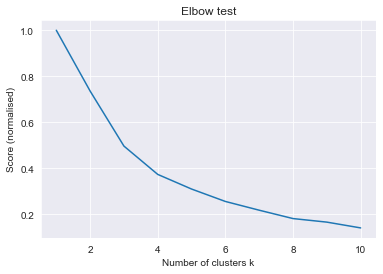

In [ ]:
num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(scaled_data_2).inertia_ for i in num_clusters]

# Optional
# We can choose to normalise the scores with respect to the score for k=1 (the highest score)
scores_normalised = scores/scores[0]

# Plot the test
sns.set_style('darkgrid')
sns.lineplot(num_clusters, scores_normalised)
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")

This looks a lot better than our other test. There is a clear elbow at either 3 or 4. I'll choose k = 4.

In [ ]:
# Create the model
model = KMeans(n_clusters = 4, random_state= 123)
# Fit the model to our data
model.fit(scaled_data_2)
# Save the results as a new column in our data
df['cluster_2'] = model.labels_

In [ ]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_1,cluster_2
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,2,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,0,3
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,1,2
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,7,3
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,2,1


Rather than looking at each of the playlists we've created, let's look at the qualities of each playlist.

I want to create a bar chart that shows each cluster and the values of the different musical qualities within each of them. To do that, I need to transform my data into "tidy" data using `melt`.

In [ ]:
# First, transform the dataframe so that it is "tidy"
melted_df = pd.melt(df, id_vars = ['cluster_1', 'cluster_2', 'id', 'name', 'artists'])

In [ ]:
melted_df.head()

,cluster_1,cluster_2,id,name,artists,variable,value
0,2,1,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,danceability,0.754
1,0,3,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,danceability,0.740
2,1,2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,danceability,0.587
3,7,3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,danceability,0.739
4,2,1,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,danceability,0.835


In [ ]:
# Set the new df index
melted_df.set_index(['id', 'cluster_1', 'cluster_2']).head()

,,,name,artists,variable,value
id,cluster_1,cluster_2,,,,
6DCZcSspjsKoFjzjrWoCd,2,1,God's Plan,Drake,danceability,0.754
3ee8Jmje8o58CHK66QrVC,0,3,SAD!,XXXTENTACION,danceability,0.740
0e7ipj03S05BNilyu5bRz,1,2,rockstar (feat. 21 Savage),Post Malone,danceability,0.587
3swc6WTsr7rl9DqQKQA55,7,3,Psycho (feat. Ty Dolla $ign),Post Malone,danceability,0.739
2G7V7zsVDxg1yRsu7Ew9R,2,1,In My Feelings,Drake,danceability,0.835


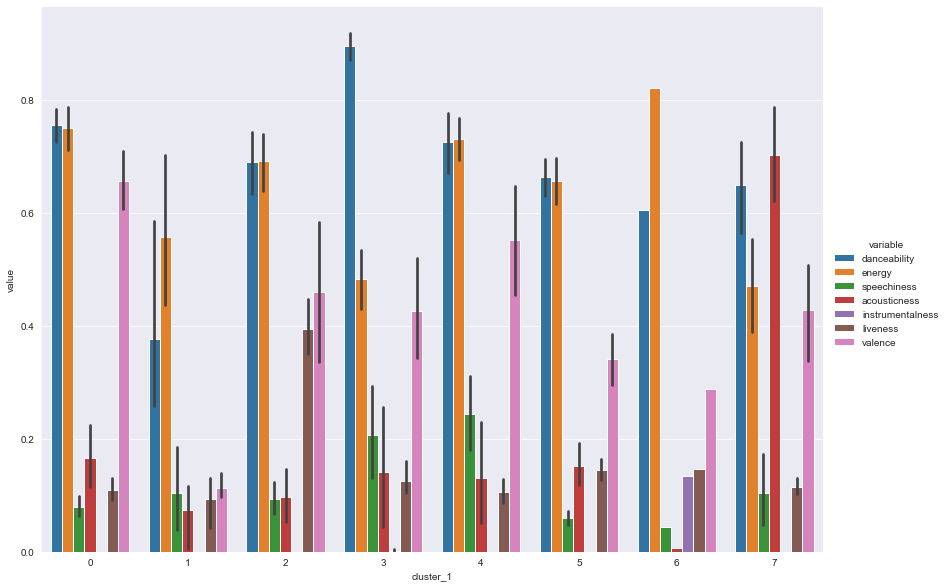

In [ ]:
# Plot the chosen values of clusters so we can compare their qualities
g = sns.catplot(x="cluster_1",
                y="value",
                hue="variable",
                data=melted_df[(melted_df['variable'] == 'danceability') |
                              (melted_df['variable'] == 'energy') |
                              (melted_df['variable'] == 'speechiness') |
                              (melted_df['variable'] == 'acousticness') |
                              (melted_df['variable'] == 'instrumentalness') |
                              (melted_df['variable'] == 'liveness') |
                              (melted_df['variable'] == 'valence') ],
                kind="bar", height=8.27, aspect=11.7/8.27)

From this graphic, we've got quite a lot of clusters, and it's hard to interpret. This is the case even after we've removed some variables. Let's look second clustering trial to see if it is more interpretable.

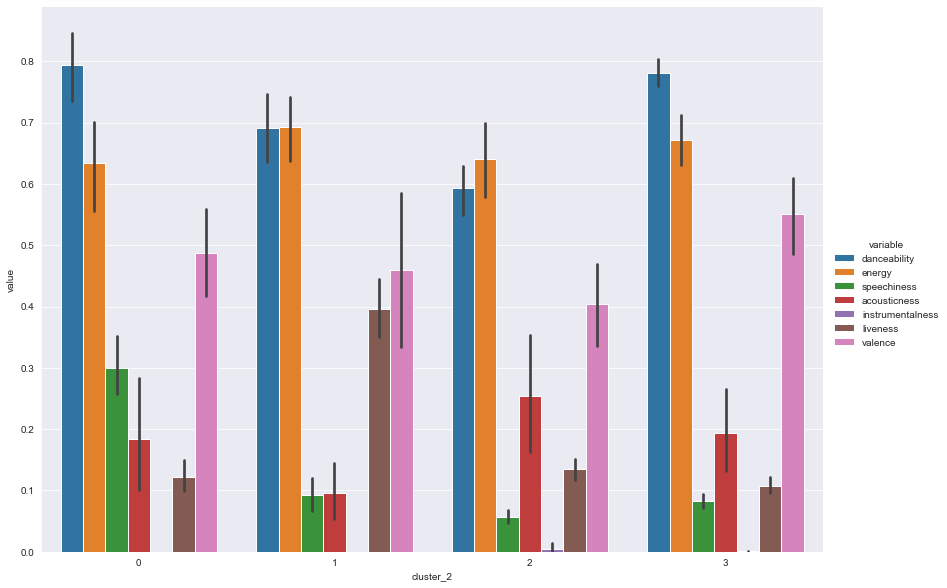

In [ ]:
g = sns.catplot(x="cluster_2",
                y="value",
                hue="variable",
                data=melted_df[(melted_df['variable'] == 'danceability') |
                              (melted_df['variable'] == 'energy') |
                              (melted_df['variable'] == 'speechiness') |
                              (melted_df['variable'] == 'acousticness') |
                              (melted_df['variable'] == 'instrumentalness') |
                              (melted_df['variable'] == 'liveness') |
                              (melted_df['variable'] == 'valence') ],
                kind="bar", height=8.27, aspect=11.7/8.27)

This is much easier to read. From this graphic, we can see that most of our clusters have songs with high danceability, energy and valence. However, cluster 0 seems to stand out for it's "speechiness", while cluster 1 also stands out for its liveness. Cluster 2 seems to have slightly more acousticness than the other groups, and cluster 3 seems very similar to cluster 0 except with less speechiness.

This is preliminary analysis. We could go back and tweak over and over until we are able to find super disinct clusters. For now, let's opt to choose Trial 2 as our solution and recommendation for the business.

## Conclusion

<div class="alert alert-warning">
<p>In this section, come back to your initial brief and write up your findings and recommendations for Spotify. Be sure to explain your analysis in detail and provide some examples of your work. You can also use this to describe your final clusters in a bit more detail.</p>
    
<p>Some things to consider:</p>
    <ul>
        <li>This section is often the most useful for non-data stakeholder. Be sure to use clear language and make it only as technical as required.</li>
        <li>Try giving a name to your clusters based on the features each of them possess.</li>
        <li>Think about the strengths and weaknesses of your analysis and share them.</li>
        <li>Give an indication of how you might further the analysis you've done here.</li>
    </ul>
</div>

From our basic analysis above, we found a couple of things.

- Using fewer variables in our analysis allows us to identify more distinct clusters
- Even when we've reduced the number of variables of interest, the clusters still have quite a lot of overlap
- Some variables are repetitive (like loudness and energy) and our dataset is also skewed towards certain characterstics (like like acousticness)

The recommendation we'd make to the business is to use our second trial algorithm to create these curated playlists.

From this dataset, those playlists would be:

| Speechy pop (Cluster 0) | Live pop (Cluster 1) | Acoustic pop (Cluster 2) | Dance pop (Cluster 3) |
| --- | --- | --- | --- |
| Look Alive (feat. Drake)	by BlocBoy JB | God's Plan by Drake | rockstar (feat. 21 Savage) by Post Malone | SAD! by XXXTENTACION |
| Te Bot? - Remix	by Nio Garcia | In My Feelings by Drake | Better Now by Post Malone | Psycho (feat. Ty Dolla $ign) by Post Malone|
| Youngblood	5 by Seconds of Summer | I Like It by Cardi B | FRIENDS by Marshmello | One Kiss (with Dua Lipa) by Calvin Harris |
| Jocelyn Flores	by XXXTENTACION | Lucid Dreams by Juice WRLD | Nice for What by Drake | IDGAF by Dua Lipa |
| Eastside (with Halsey & Khalid)	by benny blanco | no tears left to cry by Ariana Grande | These Days by Rudimental | Havana	Camila Cabello |
| River (feat. Ed Sheeran) by Eminem | X by Nicky Jam | Meant to be (feat. Florida Georgia Line) by Bebe Rexha | Girls Like You (feat. Cardi B)	by Maroon 5 |
| SICKO MODE	by Travis Scott | Mine by Bazzi | Perfect by Ed Sheeran | The Middle by Zedd |
| Ric Flair Drip (& Metro Boomin)	by Offset | Solo (feat. Demi Lovato) by Clean Bandit | I Fall Apart by Post Malone | All The Stars (with SZA) by Kendrick Lamar |
| Freaky Friday (feat. Chris Brown) by Lil Dicky | Nevermind by Dennis Lloyd | Never Be the Same by Camila Cabello | Moonlight by XXXTENTACION |
| FEFE (feat. Nicki Minaj & Murda Beatz) by 6ix9ine | Dura by Daddy Yankee | changes by XXXTENTACION | New Rules by Dua Lipa |
| XO TOUR Llif3 by Lil Uzi Vert | Me Niego by Reik | Thunder by Imagine Dragons | Shape of You by Ed Sheeran |
| Taki Taki (with Selena Gomez, Ozuna & Cardi B) by DJ Snake | Call Out My Name by The Weeknd | Back to You by Selena Gomez | Love Lies (with Normani) by Khalid |
| Walk It Talk It by Migos | Him & I (with Halsey) by G-Eazy | Let You Down by NF | Taste (feat. Offset) by Tyga | Echame La Culpa by Luis Fonsi |
| Stir Fry by Migos | Promises (with Sam Smith) by Calvin Harris | Happier by Marshmello | Wolves by Selena Gomez |
| 8Coraz?n (feat. Nego do Borel) by Maluma | | Too Good At Goodbyes by Sam Smith | In My Mind by Dynoro |
| Yes Indeed by Lil Baby | | Rise by Jonas Blue | Jackie Chan by Tiesto |
| I Like Me Better by Lauv | | In My Blood by Shawn Mendes | Finesse (Remix) [feat. Cardi B] by Bruno Mars |
| No Brainer by DJ Khaled| | Silence by Marshmello | Believer by Imagine Dragons |
| | | God is a woman by Ariana Grande | Body (feat. brando) by Loud Luxury |
| | | Flames by David Guetta | Sin Pijama by Becky G |
| | | Let Me Go by Hailee Steinfield | 2002 by Anne-Marie |
| | | Congratulations by Post Malone | Nonstop by Drake |
| | | lovely (with Khalid) by Billie Eilish | Fuck Love (feat. Trippie Redd) by XXXTENTACION |
| | | Perfect Duet (Ed Sheeran & Beyonce) by Ed Sheeran | Dejala que vuelva (feat. Manuel Turizo) by Piso 21 |
| | | This Is Me by Keala Settle | What Lovers Do by Maroon 5 |
| | | Rewrite The Stars	by Zac Efron | Feel It Still by Portugal. The Man |
| | | I Miss You (feat. Julia Michaels)	by Clean Bandit | Pray For Me (with Kendrick Lamar) by The Weeknd |
| | | Dusk Till Dawn - Radio Edit by ZAYN | Candy Paint by Post Malone |
| | | Be Alright by Dean Lewis | 1, 2, 3 (feat. Jason Derulo & De La Ghetto) by Sofia Reyes |
| | | (feat. Jason Derulo & De La Ghetto) by Sofia Reyes |
| | | Criminal by Natti Natasha |
| | | Plug Walk by Rich The Kid |
| | | HUMBLE. by Kendrick Lamar
| | | Vaina Loca by Ozuna |
| | | Young Dumb & Broke by Khalid |
| | | Siguelo Bailando by Ozuna |
| | | Downtown by Anitta |
| | | Bella by Wolfine |
| | | Everybody Dies In Their Nightmares by XXXTENTACION |

Going forward, it would be useful to tweak our parameters much more; we could combine them, drop some, remove ones that aren't good distinguishers between clusters, or perhaps even add some from other datasets (genre perhaps?).

It would also be good to try some other clutsering algorithms like DBSCAN and compare the results.

Finally, a much larger dataset would allow more meaningful clusters to be developed. This is very much just a proof-of-concept.

<div class="alert alert-success">
    <strong>Question 1</strong>
    <p>Provide a bar chart that shows the number of songs per cluster.</p>
</div>

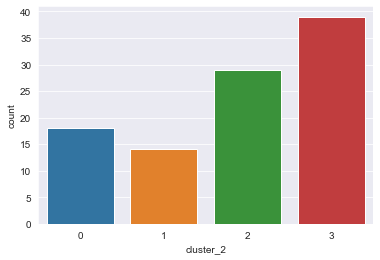

In [ ]:
sns.countplot(x="cluster_2", data=df)

<div class="alert alert-success">
    <strong>Question 2</strong>
    <p>Provide a visualisation or visualisations that show the average value for each feature in each cluster.</p>
</div>

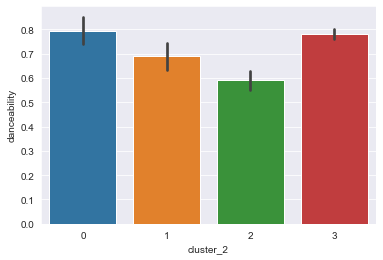

In [ ]:
sns.barplot(x='cluster_2', y='danceability', data=df)

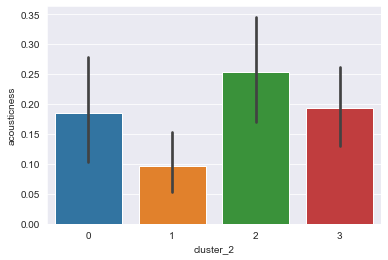

In [ ]:
sns.barplot(x='cluster_2', y='acousticness', data=df)

And so on

<div class="alert alert-success">
    <strong>Question 3</strong>
    <p>What are the playlists your algorithm would recommend for this dataset?</p>
</div>

See above

# Optional material

**This challenge involves making a call to a live API. It is common for firewalls to block calls to APIs/URLs directly from Python code so you may find you are restricted from completing this challenge within your work network.**

Above, we provided you with a dataset of Spotify's Top 100 songs that is [available publicly on Kaggle](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018).

You can also try pulling your own data from Spotify instead of using this public dataset.

Spotify make some of their internal data accessible to the public via [their API service](https://developer.spotify.com/documentation/web-api/), and there's a great Python library called [Spotipy](https://spotipy.readthedocs.io/en/latest/) that allows you to interact with this API using Python.

In order to pull any data from Spotify's servers using Spotipy, you will need to:

1. [Register](https://www.spotify.com/uk/signup/) for a Spotify account (or use an existing one)
2. Visit the [Spotify developer area](https://developer.spotify.com/dashboard/applications)
2. [register "an application"](https://developer.spotify.com/documentation/general/guides/app-settings/#register-your-app)
3. Note down your **Client ID** and **Client Secret**.
4. Edit the settings of your application to add a **Redirect URI**; this is a web address that Spotify will use to confirm your credentials. You can probably set this to "http://localhost:3000", but you may need to use a different address if you system has specific permissions/protections set up.

Your **client ID** and **Client Secret** are your credentials for accessing Spotify using code. Spotify uses them to track every time you request data, and to make sure that you only gain access to information you have a right to.

**You should treat the details as securely as you would treat any other account information. Don't share your details with anyone.**

Once you have those details, you can "log in" to Spotify with Spotipy using one of the two authorisation flows below (found in the [Spotipy documentation](https://spotipy.readthedocs.io/en/latest/)):

### Authentication set-up

Create the following three variables, and set them to the *exact same* values as those on Spotify.

In [ ]:
# Import the spotipy library

import spotipy

# Authentication for general data

from spotipy.oauth2 import SpotifyClientCredentials

# Authentication for user-specific data

import spotipy.util as util

client_id = "XXXXXXXXXX"
client_secret = "XXXXXXXXXX"
redirect_uri = "XXXXXXXXXX"

ModuleNotFoundError: No module named 'spotipy'

### If you don't need a specific user's data

#### Use the Client Credentials Flow
This will give you access to general Spotify data that isn't tied to any one user.

In [ ]:
# Run the following code to log in
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Once you've logged in, you can call methods on `sp` to get data. Look through the examples and documentation on [Spotipy's website](https://spotipy.readthedocs.io/).

In [ ]:
# For example, get Spotify data about Beyonce
results = sp.search(q='artist:' + 'XXXXXXXX', type='artist')

### If you do need a specific user's data

#### Use the Authorization Code Flow
This will allow a user to log into Spotify and give your code access to their own Spotify data (like what their top tracks are).

In [ ]:
# The account username

username = "XXXXXXXXXX"

# Give a comma-separated list of the scopes of data you'd like access to - what permissions do you need?
scope = "user-top-read, user-read-recently-played, user-read-currently-playing"

# Input your variables above and get a token from Spotify to log in
token = util.prompt_for_user_token(username,scope,
                                   client_id=client_id,
                                   client_secret=client_secret,
                                   redirect_uri=redirect_uri)

# Actually log in with that token
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

Spotify provides lots of different scope options; you can find a full list [here](https://developer.spotify.com/documentation/general/guides/scopes/).

Once you've run the flow above, you can access information such as the track the user is currently playing:

In [ ]:
# Get the currently-playing song for the authenticated user

current_track = sp.current_user_playing_track()

if current_track:
    print(current_track["item"]["name"])
else:
    print("No track playing.")

Or the user's recent plays:

In [ ]:
# Get the user's recently-played tracks

recents = sp.current_user_recently_played()

for recent_play in recents["items"]:
    track = recent_play["track"]["name"]
    artist = recent_play["track"]["album"]["artists"][0]["name"]
    print(track, "-", artist)

Because Spotify returns quite complex objects, with a lot of information in them, you may need to do quite a lot of burrowing into the tracks to get the information you want. The code above shows how to extract the track name and artist, but other information can be pulled out in the same way.

Finally, you can start converting this raw data into a pandas dataframe.

In [ ]:
# Create a holder for the data

data_holder = []

# Extract the data you want for each track

for recent_play in recents["items"]:
    track = recent_play["track"]["name"]
    artist = recent_play["track"]["album"]["artists"][0]["name"]
    played = recent_play["played_at"]
    data_holder.append([track, artist, played])

In [ ]:
# Create the dataframe

recent_df = pd.DataFrame(columns=["track", "artist", "played_at"],
                         data=data_holder)

In [ ]:
# View the dataframe

recent_df.head()

Once you are comfortable with the Spotify API, you can pull any data you want (assuming it's available). With that data, you can perform clustering, or any other form of analysis you wish.